In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import IBMQ, Aer, assemble, transpile, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import *
from qiskit.tools.jupyter import *
from ibm_quantum_widgets import *
from qiskit.tools.monitor import job_monitor

In [2]:
def initialize_circuit(qc, qubits):
  for q in qubits:
    qc.h(q)
  return qc

In [3]:
qc = QuantumCircuit(3)
#oracle
#Se aplica una compuerta S al qubit 0
# Y se aplica una compuerta cz, entre 1 y 0
qc.s(0)
qc.cz(1, 0)


oracle_3 = qc.to_gate()
oracle_3.name = "Uω"

In [4]:
#difuser
def diffuser(qubits):
  qc = QuantumCircuit(qubits)
  for qubit in range(qubits):
    qc.h(qubit) 
  for qubit in range(qubits):
    qc.x(qubit)
  qc.h(qubits-1)
  qc.mct(list(range(qubits-1)), qubits-1)
  qc.h(qubits-1)
  for qubit in range(qubits):
    qc.x(qubit)
  for qubit in range(qubits):
    qc.h(qubit)
  U_s = qc.to_gate()
  U_s.name = "Us"
  return U_s

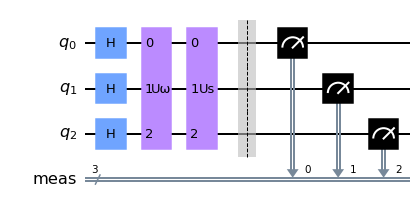

In [5]:
#Ensamble del circuito de Grover
n_qubits = 3
grover_circuit = QuantumCircuit(n_qubits)
grover_circuit = initialize_circuit(grover_circuit, [0, 1, 2])
grover_circuit.append(oracle_3, [0, 1, 2])
grover_circuit.append(diffuser(n_qubits), [0, 1, 2])
grover_circuit.measure_all()
grover_circuit.draw()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


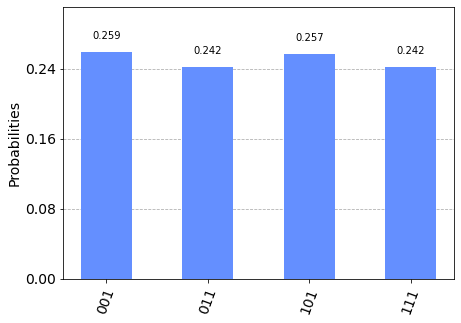

In [6]:
#Histograma en un computador simulado
backend = Aer.get_backend('qasm_simulator')
transpiled_grover_circuit = transpile(grover_circuit, backend)
job = execute(transpiled_grover_circuit, backend)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)